In [1]:
import numpy as np
import matplotlib.pyplot as plt

$x_{n+1} = a_0 + a_1x_n + a_2x_n^2 + a_3x_ny_n + a_4y_n + a_5y_n^2 $

$y_{n+1} = a_6 + a_7x_n + a_8x_n^2 + a_9x_ny_n + a_{10}y_n + a_{11}y_n^2$

A nice innovation in the paper was to identify the attractors by their series $a_0... a_{11}$.                            
This was done by choosing values for each between -1.2 to 1.2 in steps of 0.1 and mapping those to uppercase letter A through to Y

In [2]:
def map_to_letter(value, min_val=-1.2, max_val=1.2, step=0.1):
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    if not (min_val <= value <= max_val):
        raise ValueError(f"Value {value} out of range [{min_val}, {max_val}]")

    index = int(round((value - min_val) / step))
    return letters[index]

def encode_coefficients(coefficients, min_val=-1.2, max_val=1.2, step=0.1):
    return ''.join(map_to_letter(c, min_val, max_val, step) for c in coefficients)

coefficients = [-0.6, -0.1, 1.1, 0.2, -0.8, 0.6, -0.7, 0.7, 0.7, 0.3, 0.6, 0.9]
encoded_string = encode_coefficients(coefficients)
print(f"Encoded string: {encoded_string}")

Encoded string: GLXOESFTTPSV


In [3]:
def map_to_value(letter, min_val=-1.2, step=0.1):
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    index = letters.index(letter)
    return round(min_val + index * step, 1)

def decode_string(encoded_string, min_val=-1.2, step=0.1):
    return [map_to_value(letter, min_val, step) for letter in encoded_string]

decoded_coefficients = decode_string('GLXOESFTTPSV')
print(f"Decoded coefficients: {decoded_coefficients}")

Decoded coefficients: [-0.6, -0.1, 1.1, 0.2, -0.8, 0.6, -0.7, 0.7, 0.7, 0.3, 0.6, 0.9]


In [4]:
def iterate(X, a):
    x,y = X
    x_next = a[0] + a[1]*x + a[2]*x**2 + a[3]*x*y + a[ 4]*y + a[ 5]*y**2
    y_next = a[6] + a[7]*x + a[8]*x**2 + a[9]*x*y + a[10]*y + a[11]*y**2
    return x_next, y_next

def compute_trajectory(a, X0=[0.1, 0.1] , n_iterations = int(1e6)):
    X = X0
    x_vals, y_vals = [X[0]], [X[1]]
    for n in range(1, n_iterations):
        X = iterate(X, a)
        x_vals.append(X[0])
        y_vals.append(X[1])
    return np.array([x_vals, y_vals])

In [11]:
A_Data = ['AMTMNQQXUYGA', 'CVQKGHQTPHTE', 'FIRCDERRPVLD', 'GIIETPIQRRUL', 'GLXOESFTTPSV',   
          'GXQSNSKEECTX', 'HGUHDPHNSGOH', 'ILIBVPKJWGRR', 'LUFBBFISGJYS', 'MCRBIPOPHTBN', 
          'MDVAIDOYHYEA', 'ODGQCNXODNYA', 'QFFVSLMJJGCR', 'UWACXDQIGKHF', 'VBWNBDELYHUL', 
          'WNCSLFLGIHGL', 'BCQAFMFVPXKQ', 'QFFVSLMJJCCR', 'MSSSRRPADDSO', 'RALLTIOBDULT']

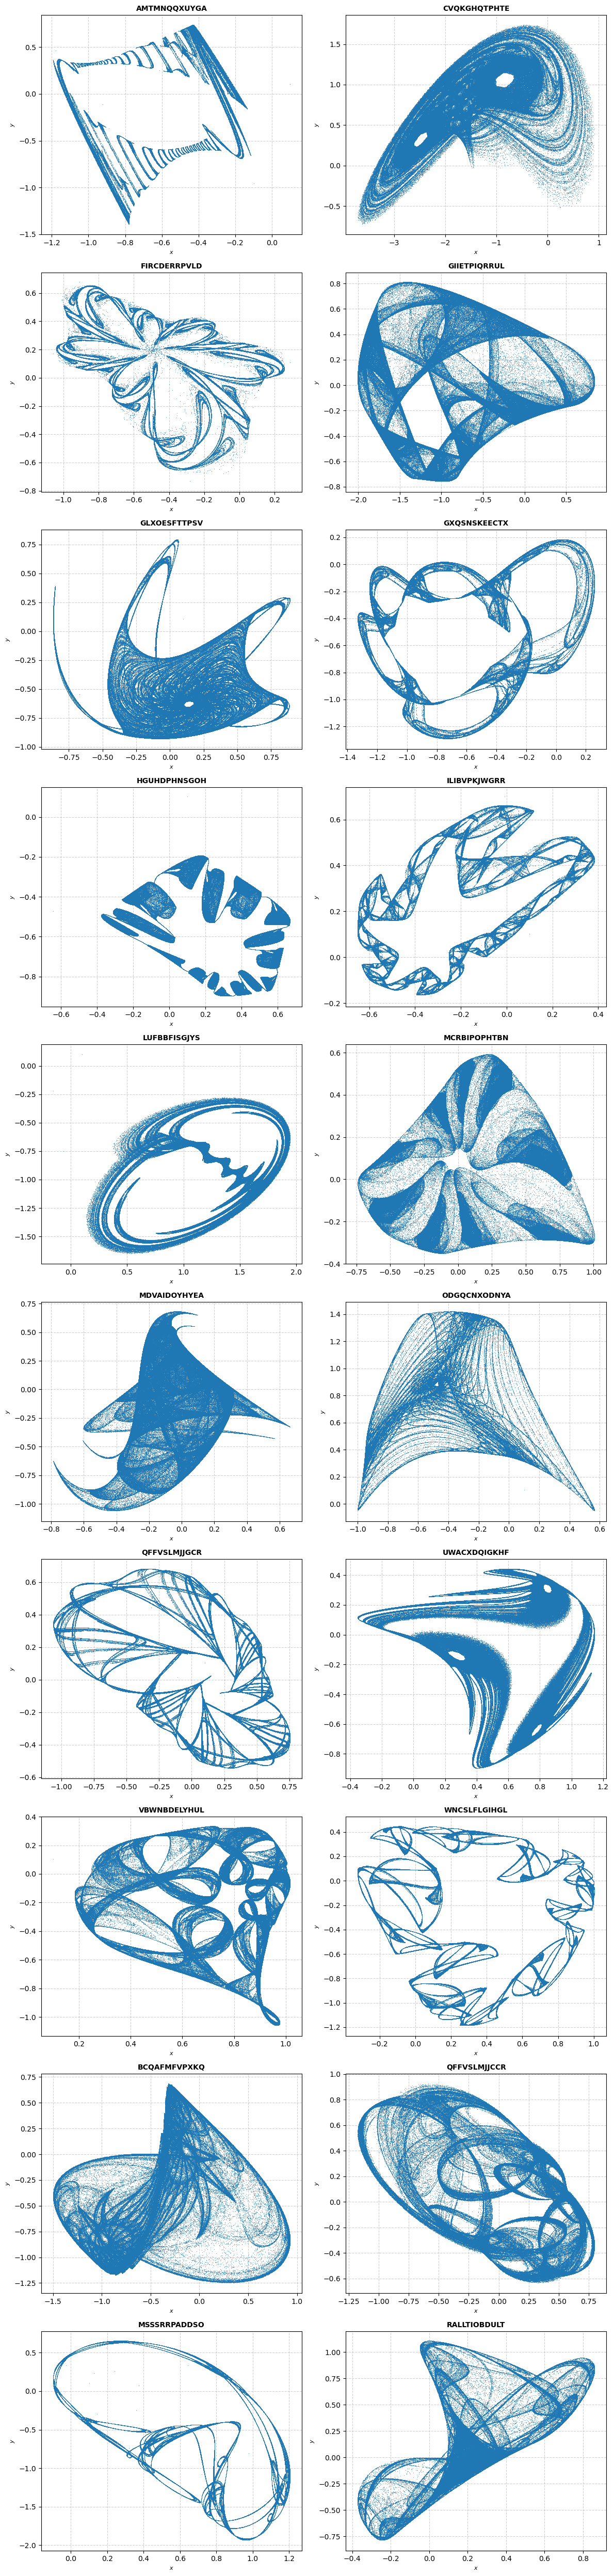

In [10]:
fig, axes = plt.subplots( 10, 2, figsize=(12,50))
axes = axes.flatten()  

for idx, A in enumerate(A_Data):
    a = decode_string(A)
    x_vals, y_vals = compute_trajectory(a)
    
    ax = axes[idx]
    ax.plot(x_vals, y_vals, ',', markersize=1, alpha=0.7)
    ax.set_title(f'{A}' , fontsize=10, fontweight='bold')
    ax.set_xlabel('$x$', fontsize=8)
    ax.set_ylabel('$y$', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
plt.show()

In [5]:
A_Data = ['AMTMNQQXUYGA', 'CVQKGHQTPHTE', 'LUFBBFISGJYS', 'MCRBIPOPHTBN', 
          'FIRCDERRPVLD', 'GIIETPIQRRUL', 'MDVAIDOYHYEA', 'ODGQCNXODNYA',    
          'GLXOESFTTPSV', 'GXQSNSKEECTX', 'QFFVSLMJJGCR', 'UWACXDQIGKHF',
          'HGUHDPHNSGOH', 'ILIBVPKJWGRR', 'VBWNBDELYHUL', 'WNCSLFLGIHGL', 
          'BCQAFMFVPXKQ', 'QFFVSLMJJCCR', 'MSSSRRPADDSO', 'RALLTIOBDULT']

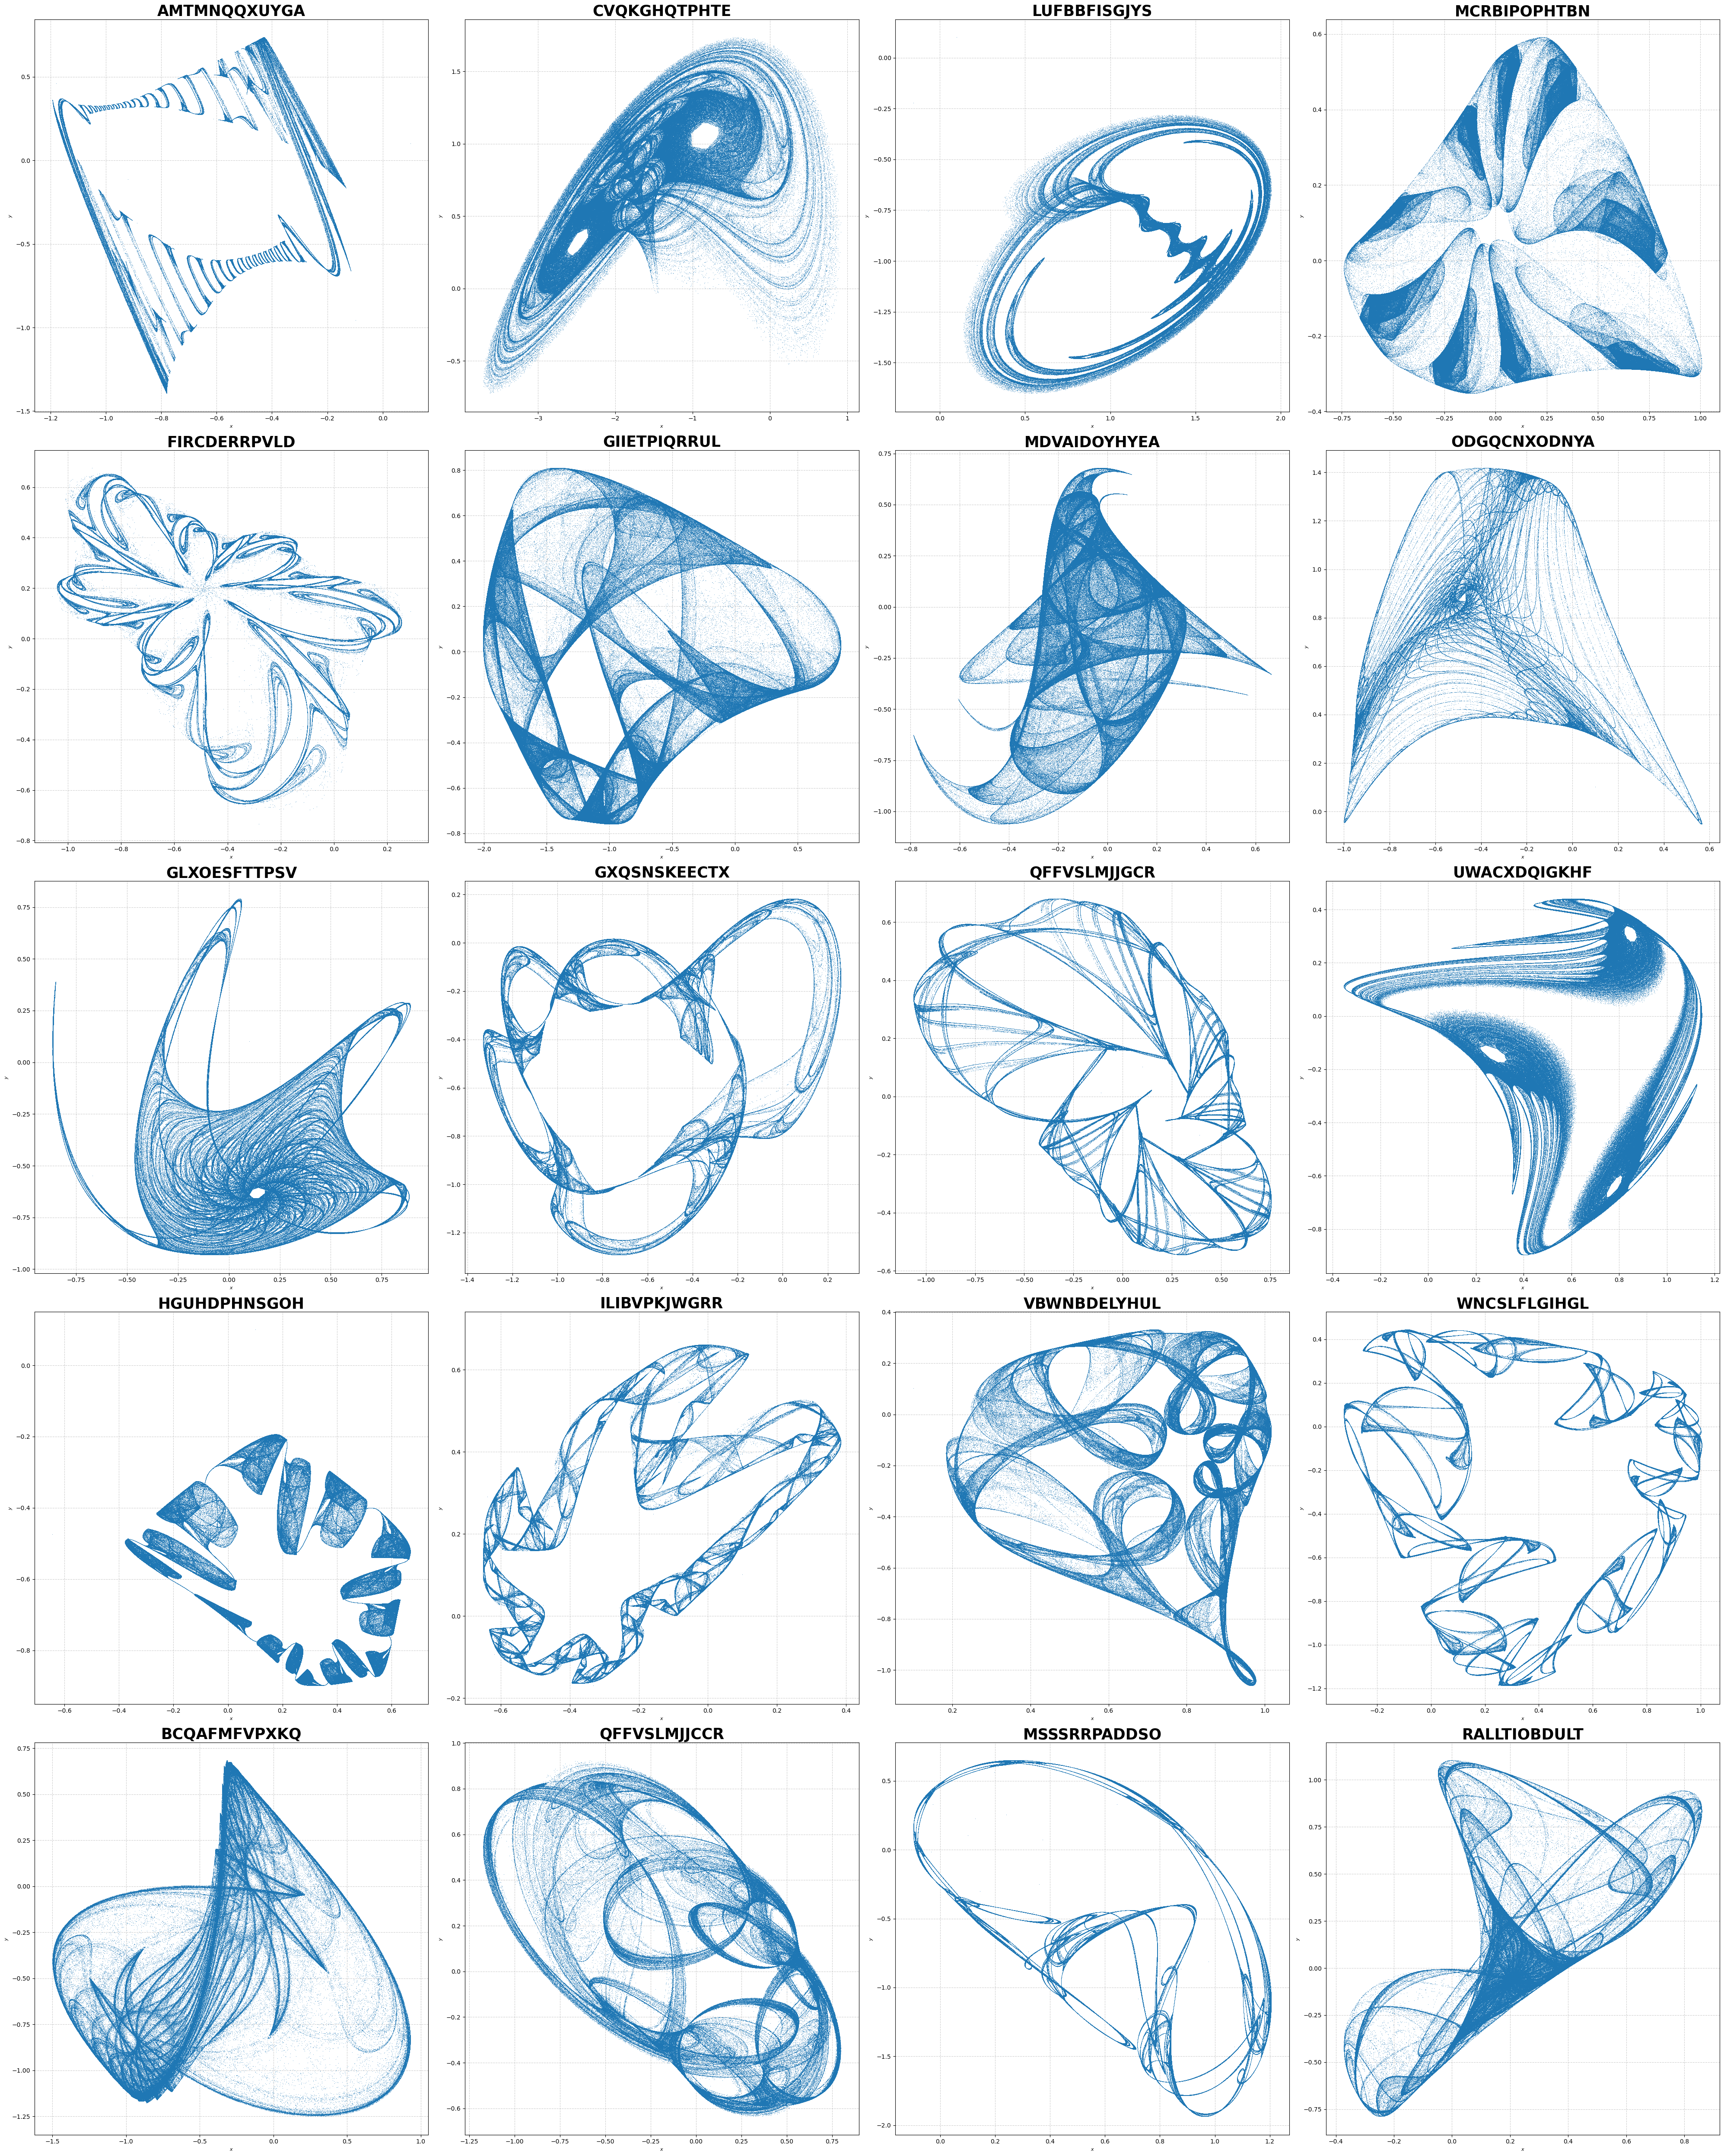

In [6]:
fig, ax = plt.subplots( 5, 4, figsize=(40,50))
ax = ax.flatten()  

for i, A in enumerate(A_Data):
    a = decode_string(A)
    x_vals, y_vals = compute_trajectory(a)
    
    ax[i].plot(x_vals, y_vals, ',', markersize=1, alpha=0.7)
    ax[i].set_title(f'{A}', fontsize=25, fontweight='bold')
    ax[i].set_xlabel('$x$', fontsize=8)
    ax[i].set_ylabel('$y$', fontsize=8)
    ax[i].grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
plt.show()